# Solar Profile in Illinois

This notebook calculates an average hourly capacity factor for solar panels in Illinois.

We use a reference solar farm, UIUC Solar Farm 1.0, located in Champaign, IL. The data was provided by the University of Illinois Facilities and Services Department.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
solarfarm_df = pd.read_csv("solarfarm_data.csv", parse_dates=True, index_col='time')
solarfarm_df

,Unnamed: 0,power_norm,power_data,kw
time,,,,
2016-01-01 00:00:00,0,0.0,0.0,0.0
2016-01-01 01:00:00,1,0.0,0.0,0.0
2016-01-01 02:00:00,2,0.0,0.0,0.0
2016-01-01 03:00:00,3,0.0,0.0,0.0
2016-01-01 04:00:00,4,0.0,0.0,0.0
...,...,...,...,...
2018-12-31 19:00:00,8755,0.0,0.0,0.0
2018-12-31 20:00:00,8756,0.0,0.0,0.0
2018-12-31 21:00:00,8757,0.0,0.0,0.0


In [3]:
hours_grouped = solarfarm_df.groupby(solarfarm_df.index.hour)

In [4]:
avg_hourly = np.zeros(len(hours_grouped))
std_hourly = np.zeros(len(hours_grouped))
for i, hour in enumerate(hours_grouped.groups):
    hour_data = hours_grouped.get_group(hour)
    avg_hourly[i] = hour_data.kw.mean()
    std_hourly[i] = hour_data.kw.std()

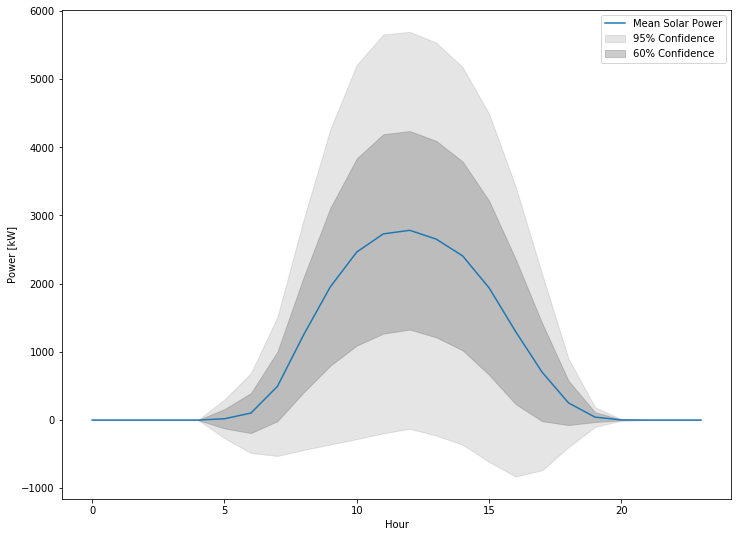

In [5]:
plt.figure(figsize=(12,9))
plt.plot(range(24), avg_hourly, label='Mean Solar Power')
plt.fill_between(range(24),
                 avg_hourly + 2 * std_hourly,
                 avg_hourly - 2 * std_hourly,
                 color='gray', alpha=0.2, label='95% Confidence')
plt.fill_between(range(24),
                 avg_hourly + std_hourly,
                 avg_hourly - std_hourly,
                 color='gray', alpha=0.4
                 , label='60% Confidence')
plt.legend()
plt.xlabel('Hour')
plt.ylabel('Power [kW]')
plt.show()

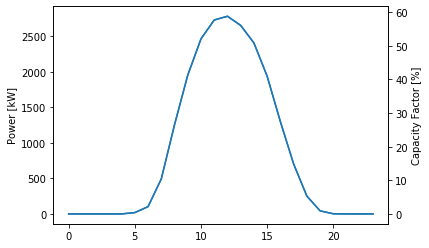

In [6]:
fig, ax = plt.subplots()
fig.figsize=(12,9)
ax.plot(range(24), avg_hourly, label='Mean Solar Power')
ax2 = ax.twinx()
ax2.plot(range(24), avg_hourly/solarfarm_df.kw.max()*100)
plt.xlabel('Hour')
ax.set_ylabel('Power [kW]')
ax2.set_ylabel('Capacity Factor [%]')
plt.show()

In [7]:
avg_hourly.mean()/solarfarm_df.kw.max()

0.1857186869482588

In [8]:
for i, v in enumerate(avg_hourly):
    print(f"Hour {i+1} : {v/solarfarm_df.kw.max()} CF")

Hour 1 : 0.0 CF
Hour 2 : 0.0 CF
Hour 3 : 0.0 CF
Hour 4 : 0.0 CF
Hour 5 : 0.0 CF
Hour 6 : 0.003949309215393088 CF
Hour 7 : 0.021653656436258873 CF
Hour 8 : 0.10411803704731513 CF
Hour 9 : 0.2653757277183415 CF
Hour 10 : 0.41281977635749434 CF
Hour 11 : 0.5207802869652568 CF
Hour 12 : 0.5767748364622984 CF
Hour 13 : 0.5879209917082173 CF
Hour 14 : 0.5606197476224247 CF
Hour 15 : 0.5084890082366348 CF
Hour 16 : 0.40941826860758135 CF
Hour 17 : 0.27435428018825925 CF
Hour 18 : 0.14846214713362432 CF
Hour 19 : 0.05306370000022829 CF
Hour 20 : 0.00906989451280749 CF
Hour 21 : 0.00037881854607546155 CF
Hour 22 : 0.0 CF
Hour 23 : 0.0 CF
Hour 24 : 0.0 CF
